In [32]:
!pip install torchviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=71a793f92988ea18c2f93137a6ad8cb35de6bdde60d7052fba0bd99126ebb110
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [1]:
import cv2 
import os 
import sys 
import pandas as pd 
import numpy as np
 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
import torch.nn.functional as F 
import torchvision 
import torchvision.transforms as transforms 
 

In [29]:
from torch.autograd import Variable 
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from torchviz import make_dot 


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#### 하나의 GPU를 사용 
```
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model = Net() 
model.to(device) 
```

#### 다수의 GPU를 사용 
```
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model = Net() 
if torch.cuda.devuce_count() > 1
    model = nn.DataParallel(net) 
model.to(device) 

```

In [4]:
train_dataset  = torchvision.datasets.FashionMNIST("FashionMNIST/", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_dataset  = torchvision.datasets.FashionMNIST("FashionMNIST/", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()])) 

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



In [7]:
def show_version():
    print("========version========")
    print(f"python {sys.version}")
    print(f"numpy {np.__version__}")
    print(f"pandas {pd.__version__}")
    print(f"cv2 {cv2.__version__}")
    print(f"torch {torch.__version__}")

def show_shape(dict_frame):
    for k, v in dict_frame.items():
        print(f"{k} shape {v.shape}")


In [12]:
show_version()

========version========
python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy 1.21.6
pandas 1.3.5
cv2 4.1.2
torch 1.11.0+cu113


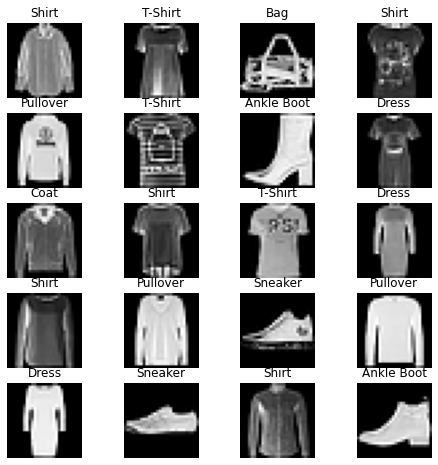

In [35]:
label_map = {0 : 'T-Shirt', 
              1 : 'Trouser', 
              2 : 'Pullover', 
              3 : 'Dress', 
              4 : 'Coat', 
              5 : 'Sandal', 
              6 : 'Shirt',
              7 : 'Sneaker', 
              8 : 'Bag', 
              9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8 ))
ncols = 4 
nrows = 5 

for i in range(1, ncols * nrows + 1):
    image_xy = np.random.randint(len(train_dataset))
    image = train_dataset[image_xy][0][0, :, :]
    fig.add_subplot(nrows, ncols, i)
    plt.title(label_map[train_dataset[image_xy][1]])
    plt.axis("off")
    plt.imshow(image, cmap="gray")

plt.show()

In [17]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100)

In [27]:
# 0~10의 임의의 숫자를 출력 
np_array_1 = np.random.randint(10)
print(np_array_1)

# 1~9의 임의의 숫자를 출력 
np_array_2 = np.random.randint(1, 10)
print(np_array_2)

# 0~1 사이의 정규 표준 분포 난수를 행렬로 출력 (1 x 8)
np_array_3 = np.random.rand(8)
print(np_array_3)


# 0~1 사이의 정규 표준 분포 난수를 행렬로 출력 (4 x 2)
np_array_4 = np.random.rand(4, 2)
print(np_array_4)

# 평균이 0이고 표준편차 1인 가우시안 정규 분포 난수를 행렬로 출력(1 x 8)
np_array_5 = np.random.randn(8)
print(np_array_5)

# 평균이 0이고 표준편차 1인 가우시안 정규 분포 난수를 행렬로 출력(4 x 2)
np_array_6 = np.random.randn(4, 2)
print(np_array_6)


0
5
[0.79074757 0.05233819 0.18232785 0.59900547 0.39739287 0.44703434
 0.42355822 0.77472014]
[[0.92615515 0.85313433]
 [0.86886418 0.79826454]
 [0.46948733 0.25793198]
 [0.30650278 0.93098392]]
[ 0.57316209 -0.52178567 -0.67175123  1.61764212 -1.9582826  -0.66627196
 -0.32526188 -0.59915614]
[[-0.15610191 -1.16447839]
 [ 0.39769486 -1.04710887]
 [ 1.80314423  0.12250513]
 [-0.16152661  0.65413331]]


In [21]:
print(type(test_dataset))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [28]:
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=256)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10)

    
    def forward(self, input_data):
        out = input_data.view(-1, 784)
        out = F.relu(self.fc1(out))
        out = self.drop(out)
        out = F.relu(self.fc2(out))
        out = self.fc3(out)

        return out 

In [33]:
learning_rate = 0.001 
model = FashionDNN() 
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [38]:
num_epochs = 5 
count = 0 
loss_list = []  
iteration_list = [] 
accuracy_list = [] 

predictions_list = []
label_list = []

for epoch in range(num_epochs): 
    for images, labels in train_loader: 
        images, labels = images.to(device), labels.to(device) 
        train = Variable(images.view(100, 1, 28, 28)) 
        labels = Variable(labels)

        outputs = model(train) 
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        count += 1

        if not (count % 50):
            total = 0 
            correct = 0 

            for images, labels in test_loader: 
                images, labels = images.to(device), labels.to(device)
                label_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28 ))

                outputs = model(test)            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


Iteration: 500, Loss: 0.5209445953369141, Accuracy: 83.94000244140625%
Iteration: 1000, Loss: 0.4413538873195648, Accuracy: 84.80999755859375%
Iteration: 1500, Loss: 0.32639533281326294, Accuracy: 85.13999938964844%
Iteration: 2000, Loss: 0.3566856384277344, Accuracy: 85.2699966430664%
Iteration: 2500, Loss: 0.2903512716293335, Accuracy: 86.06999969482422%
Iteration: 3000, Loss: 0.2744329869747162, Accuracy: 86.62000274658203%
